<img src="https://img.freepik.com/free-photo/hand-holding-blood-glucose-meter-measuring-blood-sugar-background-is-stethoscope-chart-file_1387-942.jpg?size=626&ext=jpg&ga=GA1.1.1667080814.1713188156&semt=sph">

# Diabetes

Diabetes is a chronic disease that occurs when the pancreas does not produce enough insulin or when the body cannot effectively use the insulin it produces. Insulin is a hormone that regulates blood sugar. High blood sugar, or hyperglycemia, is a common effect of uncontrolled diabetes and over time leads to serious damage to many of the body's systems, particularly the nerves and blood vessels.

### Types of Diabetes
- **Type 1 diabetes**: Usually develops in childhood or adolescence and is characterized by the body's immune system attacking and destroying the insulin-producing cells in the pancreas.
- **Type 2 diabetes**: The most common form of diabetes, where the body becomes resistant to insulin or doesn't make enough insulin. It can develop at any age and is often associated with obesity.
- **Gestational diabetes**: Occurs during pregnancy and usually goes away after the baby is born, but it can increase the mother's risk of developing type 2 diabetes later in life.
- **Prediabetes**: A condition where blood sugar levels are higher than normal but not high enough to be diagnosed as type 2 diabetes. Without intervention, it often leads to type 2 diabetes.

### Managing Diabetes
Managing diabetes involves a combination of diet, physical activity, medication, and regular screening and treatment for complications. Early diagnosis and treatment are crucial to prevent or delay the onset of serious health problems associated with diabetes.

# Importing modules & libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ml models

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score

import warnings
from scipy.stats import norm
warnings.filterwarnings('ignore')
%matplotlib inline

---
## Dataset Overview

**Origin**: National Institute of Diabetes and Digestive and Kidney Diseases

**Objective**: To predict diabetes diagnosis based on diagnostic measurements.

**Contents**:
- **Independent Variables**: Various medical predictor variables.
- **Dependent Variable**: Outcome (Diabetes diagnosis).

***File Format***: CSV (Comma-Separated Values)
---


## Dataset Attributes Description

- **Pregnancies**: Number of times pregnant.
  - *Type*: Integer
  - *Range*: Typically 0 to 17

- **Glucose**: Plasma glucose concentration 2 hours in an oral glucose tolerance test.
  - *Type*: Integer
  - *Units*: mg/dL
  - *Clinical Range*: 70-199 mg/dL

- **BloodPressure**: Diastolic blood pressure.
  - *Type*: Integer
  - *Units*: mm Hg
  - *Clinical Range*: 40-122 mm Hg

- **SkinThickness**: Triceps skin fold thickness.
  - *Type*: Integer
  - *Units*: mm
  - *Clinical Range*: 7-99 mm

- **Insulin**: 2-Hour serum insulin.
  - *Type*: Integer
  - *Units*: µU/mL
  - *Clinical Range*: 15-276 µU/mL

- **BMI**: Body mass index.
  - *Type*: Float
  - *Units*: kg/m²
  - *Clinical Range*: 18.5-50 kg/m²

- **DiabetesPedigreeFunction**: Diabetes pedigree function score.
  - *Type*: Float
  - *Range*: 0.078-2.42

- **Age**: Age of the patient.
  - *Type*: Integer
  - *Range*: 21 years and above

- **Outcome**: Diabetes diagnosis outcome.
  - *Type*: Binary (0 or 1)
  - *Description*: 1 indicates presence of diabetes, 0 indicates absence.



### Importing the training and testing data set

In [2]:
train = pd.read_csv('../DataSets/Training.csv')
test = pd.read_csv("../DataSets/Testing.csv")

In [3]:
train.shape

(2460, 9)

In [4]:
test.shape

(308, 9)

In [5]:
train.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


In [6]:
train.tail(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
2458,1,96,64,27,87,33.2,0.289,21,0
2459,6,105,70,32,68,30.8,0.122,37,0


In [7]:
train.sample(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1337,5,136,84,41,88,35.0,0.286,35,1
1362,7,109,80,31,0,35.9,1.127,43,1


## Heatmap of Correlation Matrix Explanation

The Python code uses Seaborn's `heatmap` function to visualize the correlation matrix of the `train` DataFrame. This matrix shows how strongly features are related to one another. Here's what the code does:

- **Correlation Calculation**: `train.corr()` computes the correlation matrix for the DataFrame, which contains the Pearson correlation coefficients between each pair of features.

- **Heatmap Visualization**: `sns.heatmap()` takes the correlation matrix and creates a color-coded grid. Each cell in the grid represents the correlation between two features, with the color intensity indicating the strength of the relationship.

- **Interpreting the Heatmap**: A correlation value close to 1 indicates a strong positive relationship, while a value close to -1 indicates a strong negative relationship. A value around 0 suggests no linear correlation.

The outcome of this code is a heatmap that provides a quick and intuitive way to identify which features are most related to each other, which can be especially useful for feature selection and understanding the structure of the data.


<Axes: >

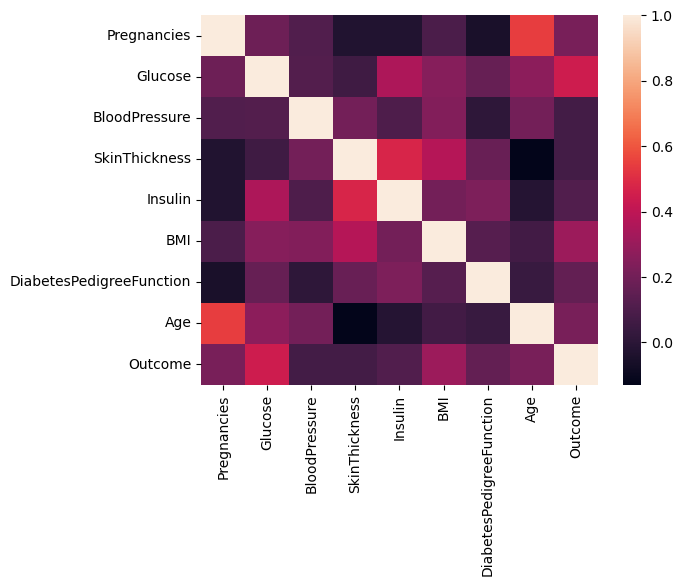

In [8]:
sns.heatmap(train.corr())

## Zero Value Counts Visualization Explanation

The Python code snippet creates a bar plot to visualize the frequency of zero values across different features in the `train` DataFrame. Here's a breakdown of the code's functionality:

- **Counting Zeros**: `(train == 0).sum()` calculates the number of zero values in each feature of the DataFrame.

- **Setting Figure Size**: `plt.figure(figsize=(4,3))` establishes the size of the figure for the plot.

- **Creating Bar Plot**: `sns.barplot()` is used to generate a bar plot with the indices of `zero_counts` on the x-axis and their corresponding values on the y-axis.

- **Rotating X-ticks**: `plt.xticks(rotation=90)` rotates the labels on the x-axis by 90 degrees for better readability.

- **Adding Title**: `plt.title("columns with values 0")` adds a title to the plot.

- **Displaying Plot**: `plt.show()` renders the plot.

The outcome is a bar plot that provides a visual representation of the count of zero values in each column, which can be useful for identifying features with many missing or placeholder values that may require further preprocessing.


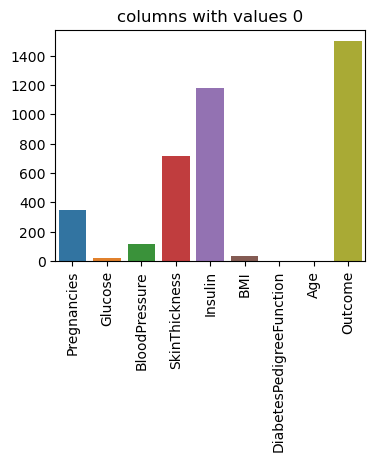

In [9]:
zero_counts = (train == 0).sum()
plt.figure(figsize=(4,3))
sns.barplot(x=zero_counts.index, y=zero_counts.values)
plt.xticks(rotation=90)
plt.title("columns with values 0")
plt.show()

### Ignoring ```Pregnancies``` and ```Outcome``` as they can be valued 0 here

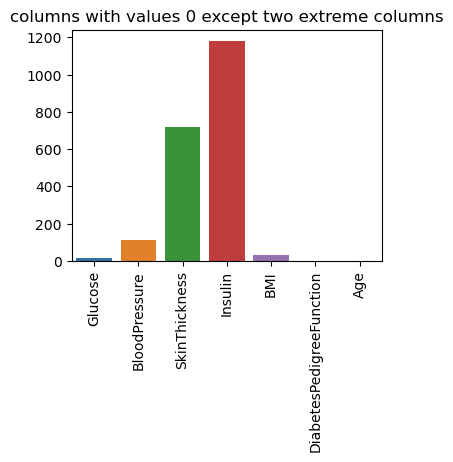

In [10]:
zero_counts_mod = (train.iloc[:,1:8] == 0).sum()
plt.figure(figsize=(4,3))
sns.barplot(x=zero_counts_mod.index, y=zero_counts_mod.values)
plt.xticks(rotation=90)
plt.title("columns with values 0 except two extreme columns")
plt.show()

In [11]:
print(f"Glucose => {(train['Glucose']==0).sum()}")
print(f"BloodPressure => {(train['BloodPressure']==0).sum()}")
print(f"SkinThickness => {(train['SkinThickness']==0).sum()}")
print(f"Insulin => {(train['Insulin']==0).sum()}")
print(f"BMI => {(train['BMI']==0).sum()}")

Glucose => 17
BloodPressure => 114
SkinThickness => 717
Insulin => 1181
BMI => 31


In [12]:
columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for column in columns:
    train = train[train[column] != 0]

In [13]:
print(f"Glucose => {(train['Glucose']==0).sum()}")
print(f"BloodPressure => {(train['BloodPressure']==0).sum()}")
print(f"SkinThickness => {(train['SkinThickness']==0).sum()}")
print(f"Insulin => {(train['Insulin']==0).sum()}")
print(f"BMI => {(train['BMI']==0).sum()}")

Glucose => 0
BloodPressure => 0
SkinThickness => 0
Insulin => 0
BMI => 0


In [14]:
t = train.sample(n=1000,replace=True,random_state=1)
train = pd.concat([train,t],ignore_index=True)
train.reset_index(drop=True,inplace=True)
train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,89,66,23,94,28.1,0.167,21,0
1,0,137,40,35,168,43.1,2.288,33,1
2,3,78,50,32,88,31.0,0.248,26,1
3,2,197,70,45,543,30.5,0.158,53,1
4,1,189,60,23,846,30.1,0.398,59,1
...,...,...,...,...,...,...,...,...,...
2263,0,165,76,43,255,47.9,0.259,26,0
2264,4,197,70,39,744,36.7,2.329,31,0
2265,10,148,84,48,237,37.6,1.001,51,1
2266,1,112,72,30,176,34.4,0.528,25,0


In [15]:
train.shape

(2268, 9)

### Dataset clearing done now

## EDA

In [16]:
train.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2268 entries, 0 to 2267
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2268 non-null   int64  
 1   Glucose                   2268 non-null   int64  
 2   BloodPressure             2268 non-null   int64  
 3   SkinThickness             2268 non-null   int64  
 4   Insulin                   2268 non-null   int64  
 5   BMI                       2268 non-null   float64
 6   DiabetesPedigreeFunction  2268 non-null   float64
 7   Age                       2268 non-null   int64  
 8   Outcome                   2268 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 159.6 KB


In [18]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,2268.0,3.348765,3.243610,0.000,1.000,2.000,5.000,17.00
Glucose,2268.0,123.472222,30.696698,71.000,100.000,119.000,144.000,197.00
BloodPressure,2268.0,70.402557,11.811665,30.000,64.000,70.000,78.000,110.00
SkinThickness,2268.0,29.181217,10.703085,7.000,21.000,29.000,37.000,63.00
Insulin,2268.0,155.784832,122.907016,14.000,74.000,120.000,192.000,846.00
BMI,2268.0,32.900000,7.053362,19.300,27.800,33.100,36.700,67.10
DiabetesPedigreeFunction,2268.0,0.525190,0.383455,0.088,0.264,0.434,0.673,2.42
Age,2268.0,30.585538,10.099732,21.000,24.000,27.000,34.000,81.00
Outcome,2268.0,0.368607,0.482533,0.000,0.000,0.000,1.000,1.00


In [19]:
train.Pregnancies.value_counts()

Pregnancies
1     565
2     368
0     288
4     214
3     207
5     178
6      91
8      83
9      76
7      73
10     43
12     23
11     16
13     14
17     14
15     10
14      5
Name: count, dtype: int64

## Pairplot with respect to Outcome to check and then Boxplot

## Pairplot Visualization Explanation

The Python code uses Seaborn's `pairplot` function to create a grid of scatter plots. Each plot represents a pairwise relationship between the features in the `train` DataFrame. The `hue` parameter is set to 'Outcome', which means the data points will be colored based on their 'Outcome' value. Here's what the code accomplishes:

- **Importing Seaborn**: The Seaborn library is imported as `sns`, which is a powerful visualization library based on matplotlib.

- **Creating Pairplot**: The `pairplot` function is called on the `train` DataFrame. It creates a matrix of scatter plots by default, showing the relationship between each pair of features.

- **Coloring by Outcome**: The plots are colored ('hue') based on the 'Outcome' column, which helps in distinguishing the data points based on their classification of having diabetes (1) or not (0).

The outcome of this code is a comprehensive visualization that can reveal patterns, correlations, and insights into the dataset, particularly how different features relate to the diabetes outcome.


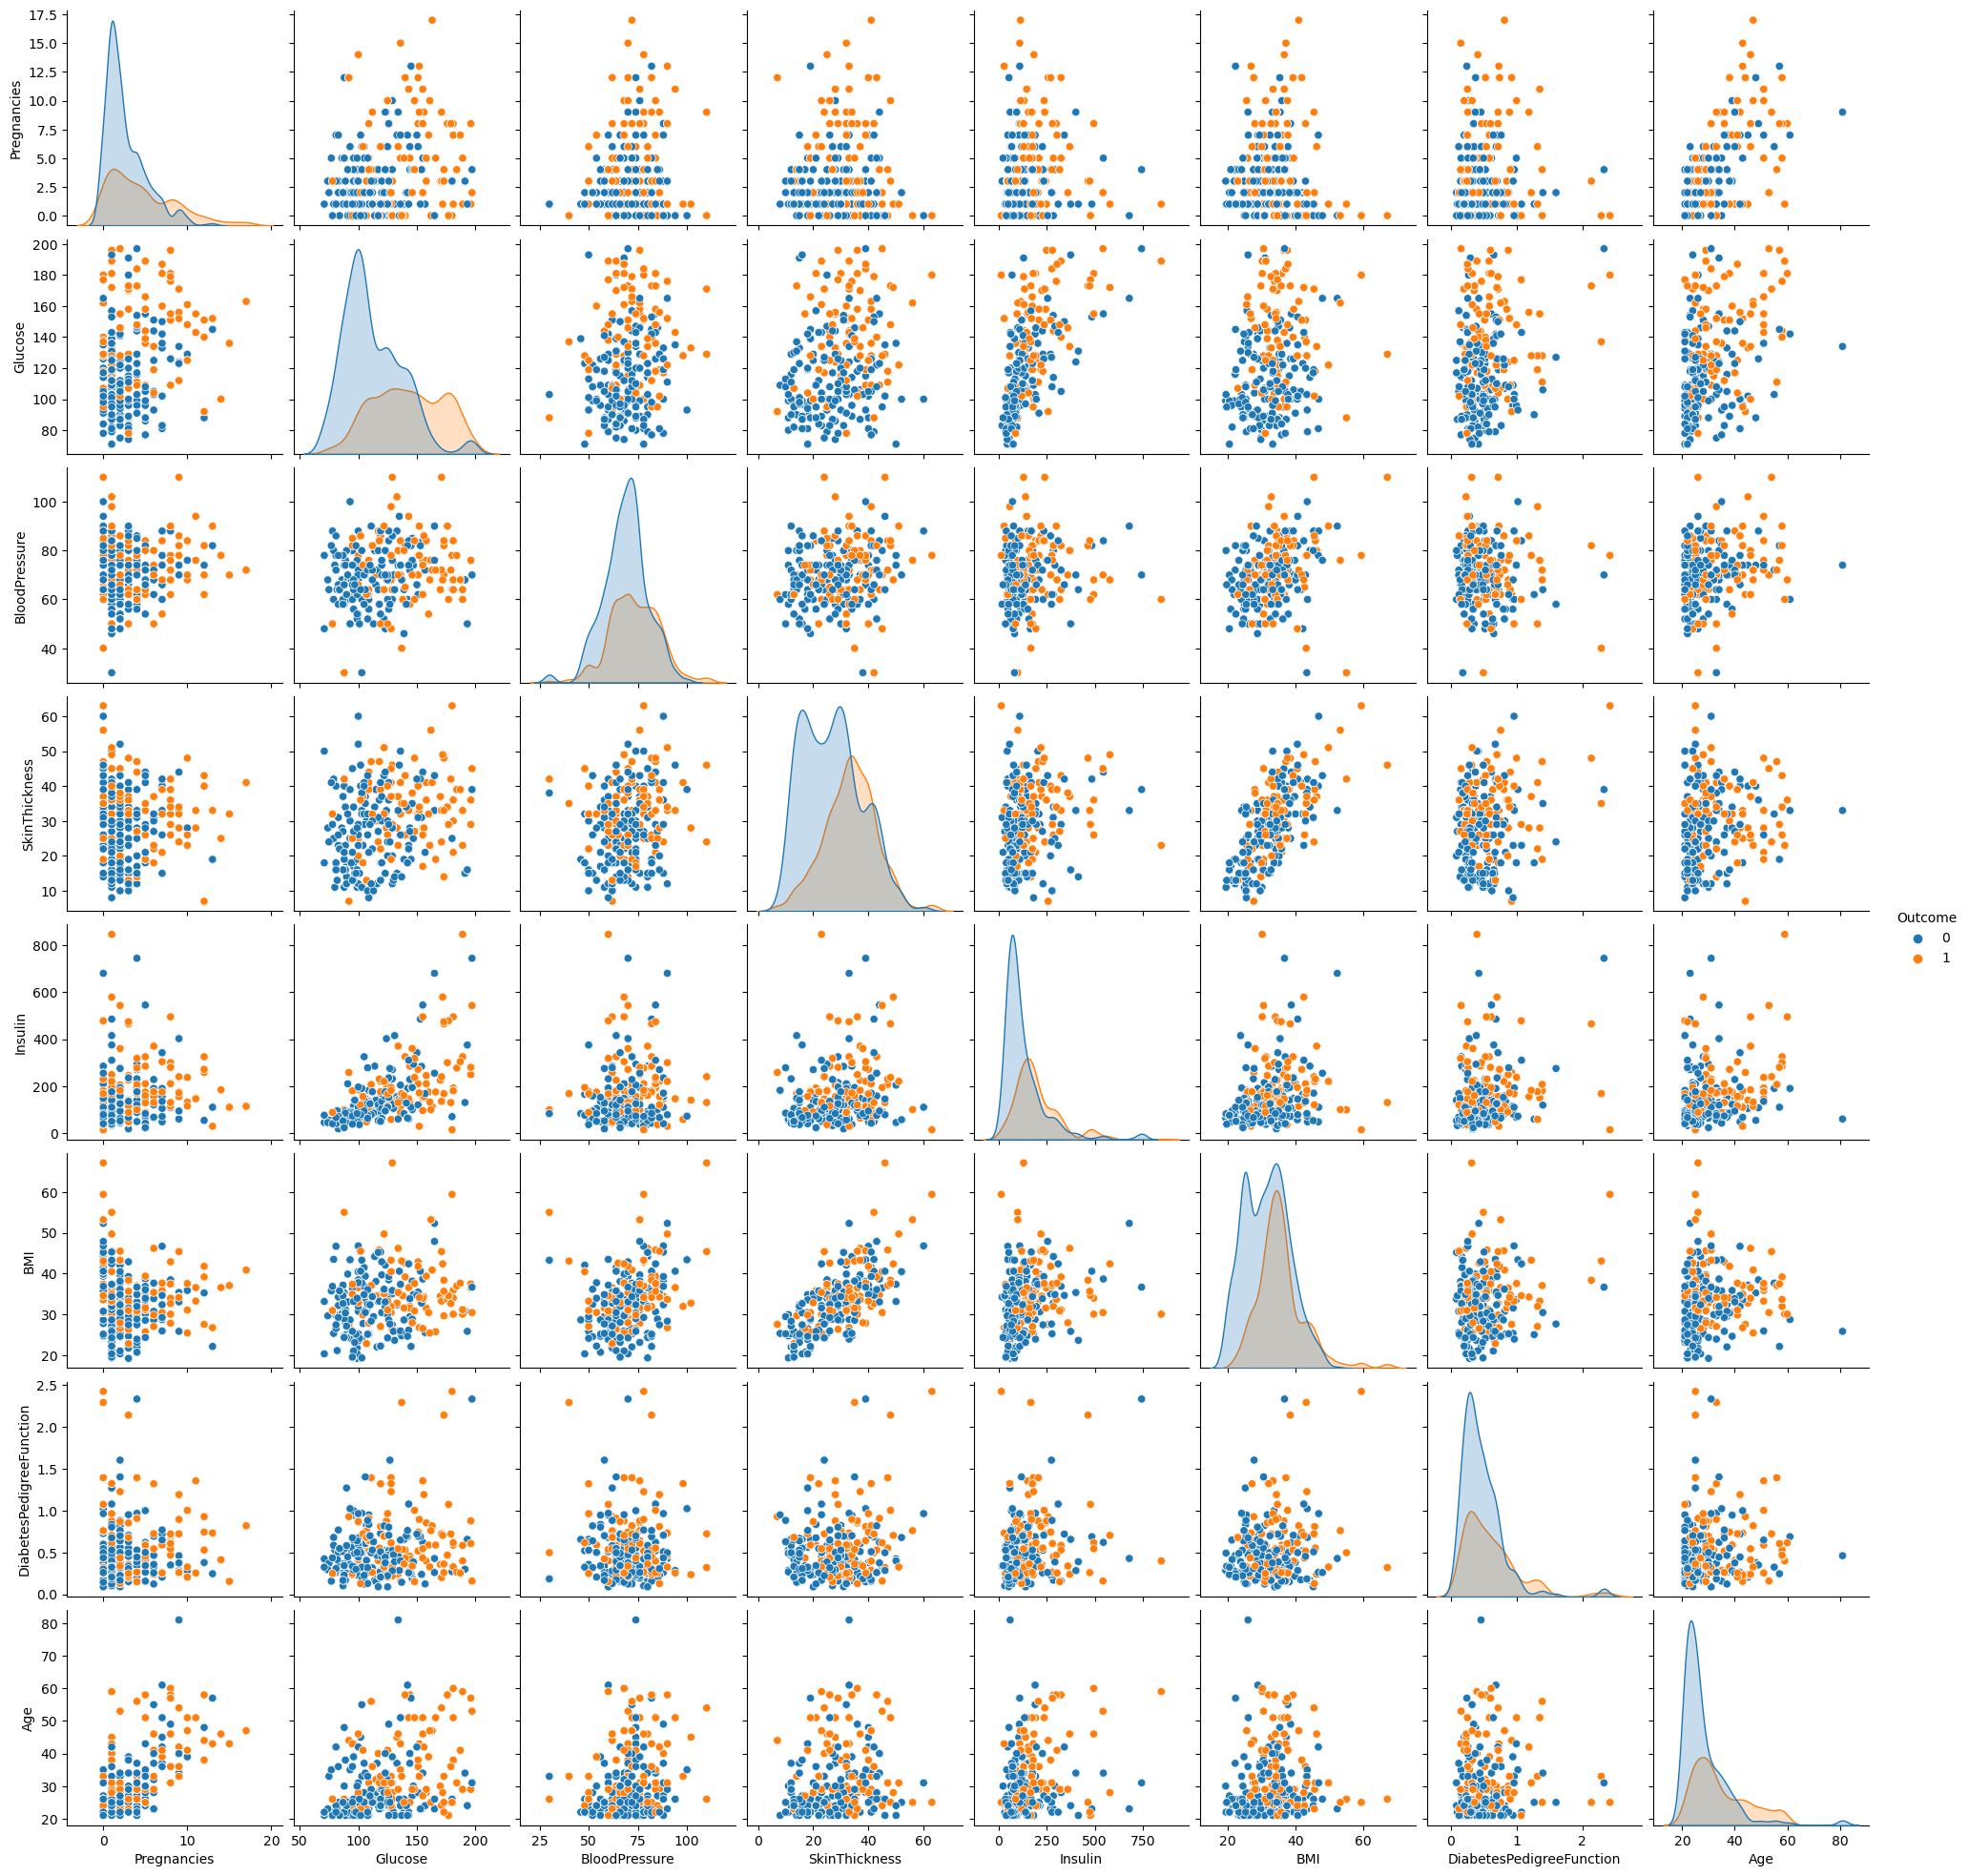

In [20]:
import seaborn as sns

# Assuming 'train' is your DataFrame
sns.pairplot(train, hue='Outcome')

## Box Plot Visualization Explanation

The Python code snippet generates box plots for selected features in the `train` DataFrame against the 'Outcome' variable. Here's the breakdown of the code's functionality:

- **Defining Columns**: A list of feature names is specified to focus the analysis on these particular columns.

- **Initializing Counter**: A counter is set to zero to keep track of the number of plots.

- **Setting Figure Size**: `plt.figure(figsize=(15, 10))` sets the size of the figure to accommodate all subplots.

- **Looping Through Columns**: The code iterates over each feature name in the `columns` list.

- **Incrementing Counter**: The counter is incremented to move to the next subplot position.

- **Creating Subplot**: `plt.subplot(3,3,counter)` arranges the box plots in a 3x3 grid.

- **Plotting Box Plot**: `sns.boxplot()` creates a horizontal box plot for each feature, with the 'Outcome' variable as the second dimension.

- **Setting Title**: Each subplot is titled with the feature name and 'Outcome' to indicate the comparison being made.

- **Adjusting Layout**: `plt.tight_layout()` adjusts the spacing between the plots for clarity.

- **Displaying Plot**: `plt.show()` renders the figure with all the box plots.

The outcome is a series of box plots that provide a visual comparison between the distribution of each feature across the two outcomes (diabetes or no diabetes). This can help identify features that have different distributions based on the 'Outcome', which may be indicative of their importance in predicting diabetes.


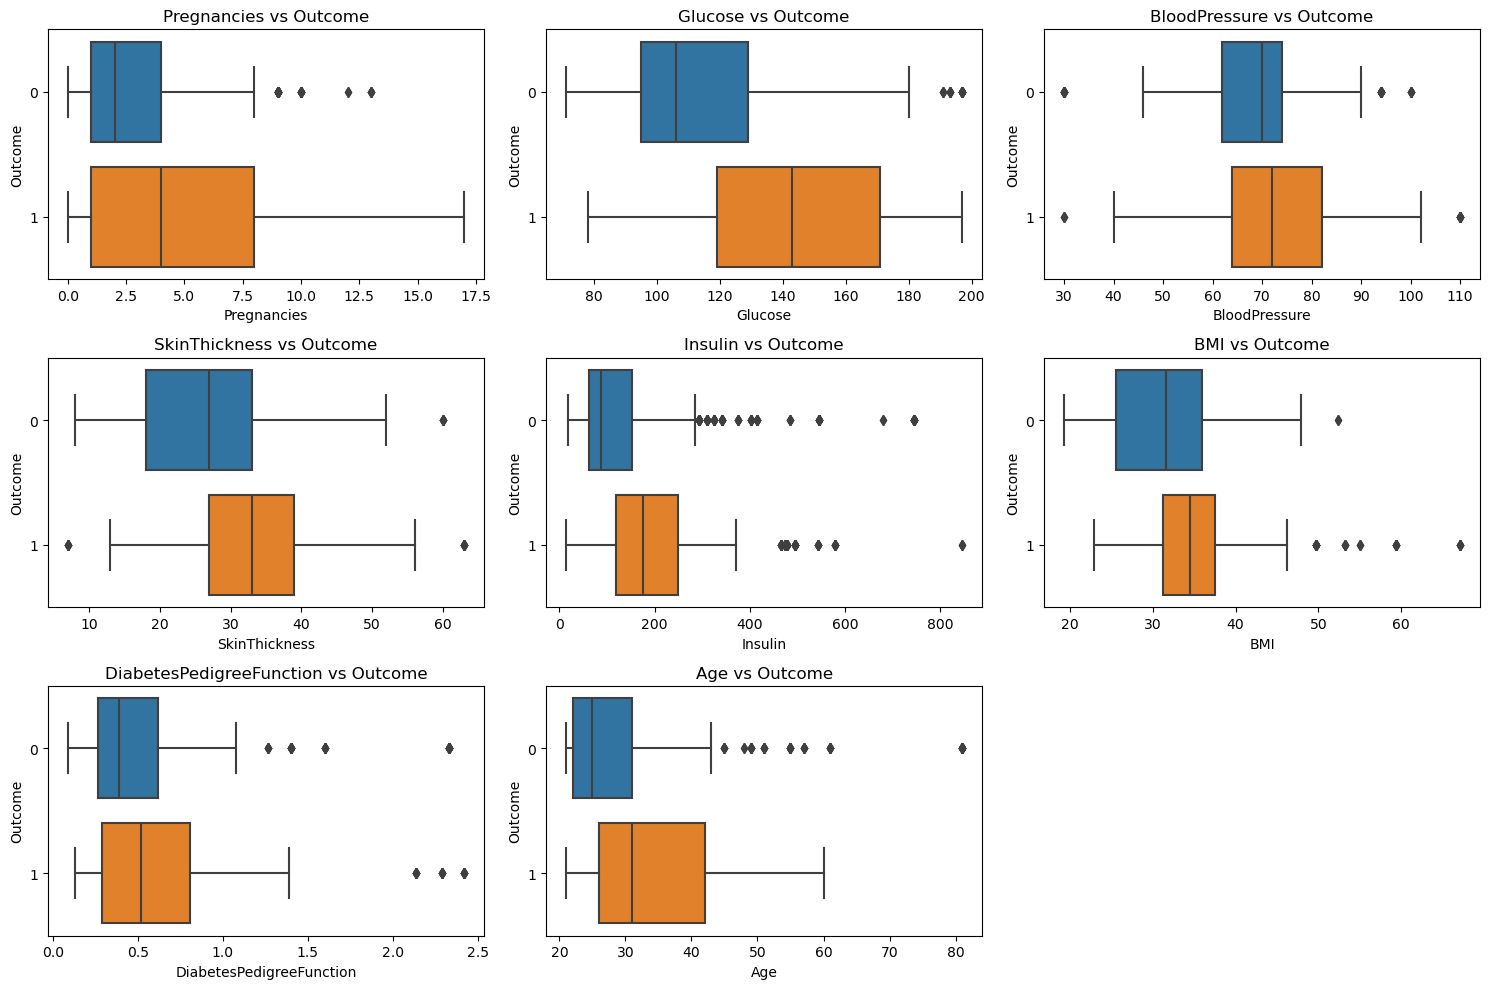

In [21]:
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
counter=0
plt.figure(figsize=(15, 10))
# palette = {str(i): v for i, v in enumerate(['blue', '#FF7600'])}
for column in columns:
    counter+=1
    plt.subplot(3,3,counter)
    sns.boxplot(x=column, y='Outcome', data=train, orient='h',dodge=True)
    plt.title(f'{column} vs Outcome')
plt.tight_layout()
plt.show()


## Vertical Box Plot Visualization Explanation

The Python code snippet generates vertical box plots for each feature in the `train` DataFrame. Here's the breakdown of the code's functionality:

- **Initializing Counter**: A counter is set to zero to keep track of the number of plots.

- **Setting Figure Size**: `plt.figure(figsize=(15, 5))` sets the size of the figure to accommodate all subplots.

- **Looping Through Columns**: The code iterates over each feature name in the DataFrame.

- **Incrementing Counter**: The counter is incremented to move to the next subplot position.

- **Creating Subplot**: `plt.subplot(3, 3, counter)` arranges the box plots in a 3x3 grid.

- **Plotting Box Plot**: `sns.boxplot()` creates a vertical box plot for each feature.

- **Adjusting Layout**: `plt.tight_layout()` adjusts the spacing between the plots for clarity.

The outcome is a series of vertical box plots that provide a visual representation of the distribution of each feature. Box plots are useful for identifying outliers, understanding the spread of the data, and seeing the median and quartiles of each feature's distribution.

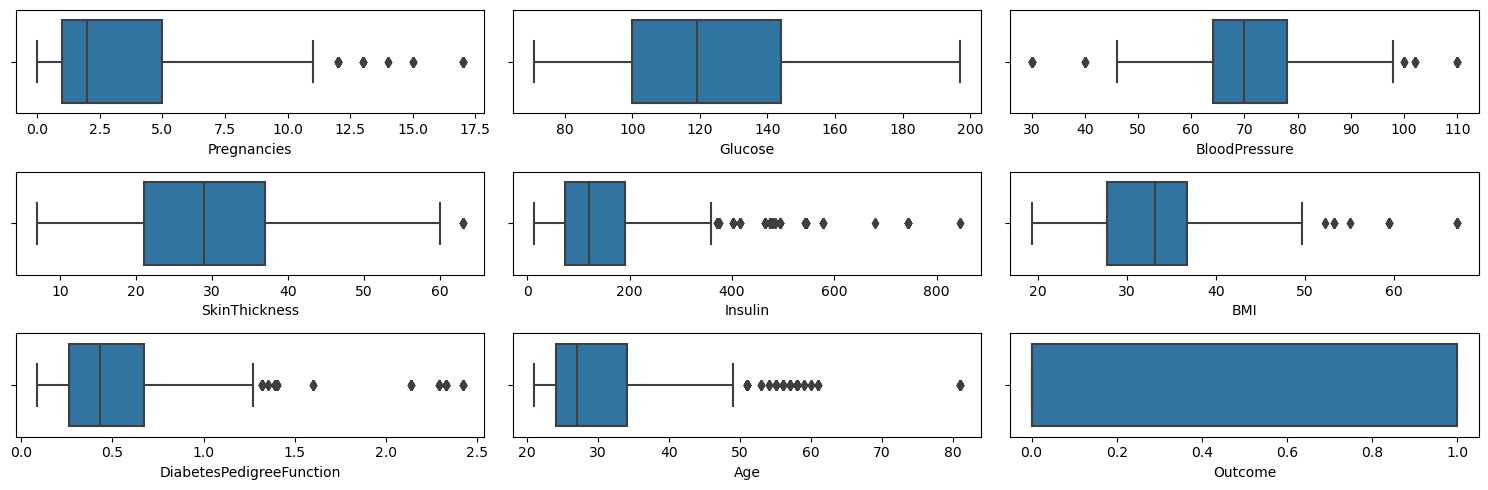

In [22]:
counter=0
plt.figure(figsize=(15,5))
for i in train.columns:
    counter+=1
    plt.subplot(3,3,counter)
    sns.boxplot(x=i,data=train,orient='v')
plt.tight_layout()

## Outliers Removal Function Explanation

The `OutLiersRemoval` function is designed to remove outliers from a specified column in a DataFrame. Here's how it works:

- **Function Definition**: `def OutLiersRemoval(train, col, th=1.5):` defines the function with three parameters: `train` (the DataFrame), `col` (the column from which to remove outliers), and `th` (the threshold for defining what constitutes an outlier, defaulting to 1.5).

- **Calculating Quartiles**: `q1` and `q3` are the first and third quartiles of the column, representing the 25th and 75th percentiles, respectively.

- **Interquartile Range (IQR)**: `iqr` is the difference between the third and first quartiles.

- **Defining Limits**: `low_lim` and `high_lim` are calculated as the first quartile minus the threshold times the IQR, and the third quartile plus the threshold times the IQR, respectively.

- **Filtering Outliers**: The DataFrame is then filtered to only include rows where the column's values are between `low_lim` and `high_lim`.

- **Printing Result**: The shape of the DataFrame after outlier removal is printed, along with the column name.

- **Returning DataFrame**: The function returns the DataFrame with outliers removed from the specified column.

This function is useful for cleaning data by removing extreme values that could skew analysis.


In [23]:
def OutLiersRemoval(train,col,th=1.5):
    q1 = train[col].quantile(0.25)
    q3 = train[col].quantile(0.75)

    iqr = q3 - q1

    low_lim = q1 - th*iqr
    high_lim = q3 + th*iqr

    train = train[(train[col] >= low_lim) & (train[col] <= high_lim)]
    print("{} of dataset after column {}".format(train.shape, col))

    return train

In [24]:
for i in train.columns:
    train = OutLiersRemoval(train,i)

(2202, 9) of dataset after column Pregnancies
(2202, 9) of dataset after column Glucose
(2153, 9) of dataset after column BloodPressure
(2144, 9) of dataset after column SkinThickness
(2022, 9) of dataset after column Insulin
(2001, 9) of dataset after column BMI
(1913, 9) of dataset after column DiabetesPedigreeFunction
(1789, 9) of dataset after column Age
(1789, 9) of dataset after column Outcome


In [25]:
print(f"new shape is {train.shape}")

new shape is (1789, 9)


# Feature Engineering

# Distplot for normal distribution

## Purpose of the Distribution Plotting Code

The Python code provided is designed to visualize the distribution of data within each feature of a dataset. This is particularly useful in the context of exploratory data analysis (EDA), where understanding the characteristics of the data is crucial. Here's why each part of the code is important:

- **Histogram and KDE**: The combination of histogram and kernel density estimate (KDE) provides a clear picture of the distribution shape, showing both the frequency (histogram) and the probability density (KDE) of the data.

- **Normal Distribution Fit**: By fitting the data to a normal distribution, we can easily compare the feature's distribution to that of a theoretical normal distribution, which is a common assumption in many statistical methods.

- **Mean and Median Lines**: Plotting lines for the mean and median gives a visual indication of the central tendency of the data, which can be compared to the peak of the KDE to assess skewness.

- **Standard Deviation Lines**: The lines at one standard deviation above and below the mean provide a visual representation of the variability in the data. In a normal distribution, approximately 68% of the data falls within this range.

- **Subplots**: Using subplots allows for the simultaneous comparison of distributions across multiple features, making it easier to identify patterns and outliers across the dataset.

Overall, this code helps in identifying trends, spotting anomalies, and making decisions about further data analysis or preprocessing steps.


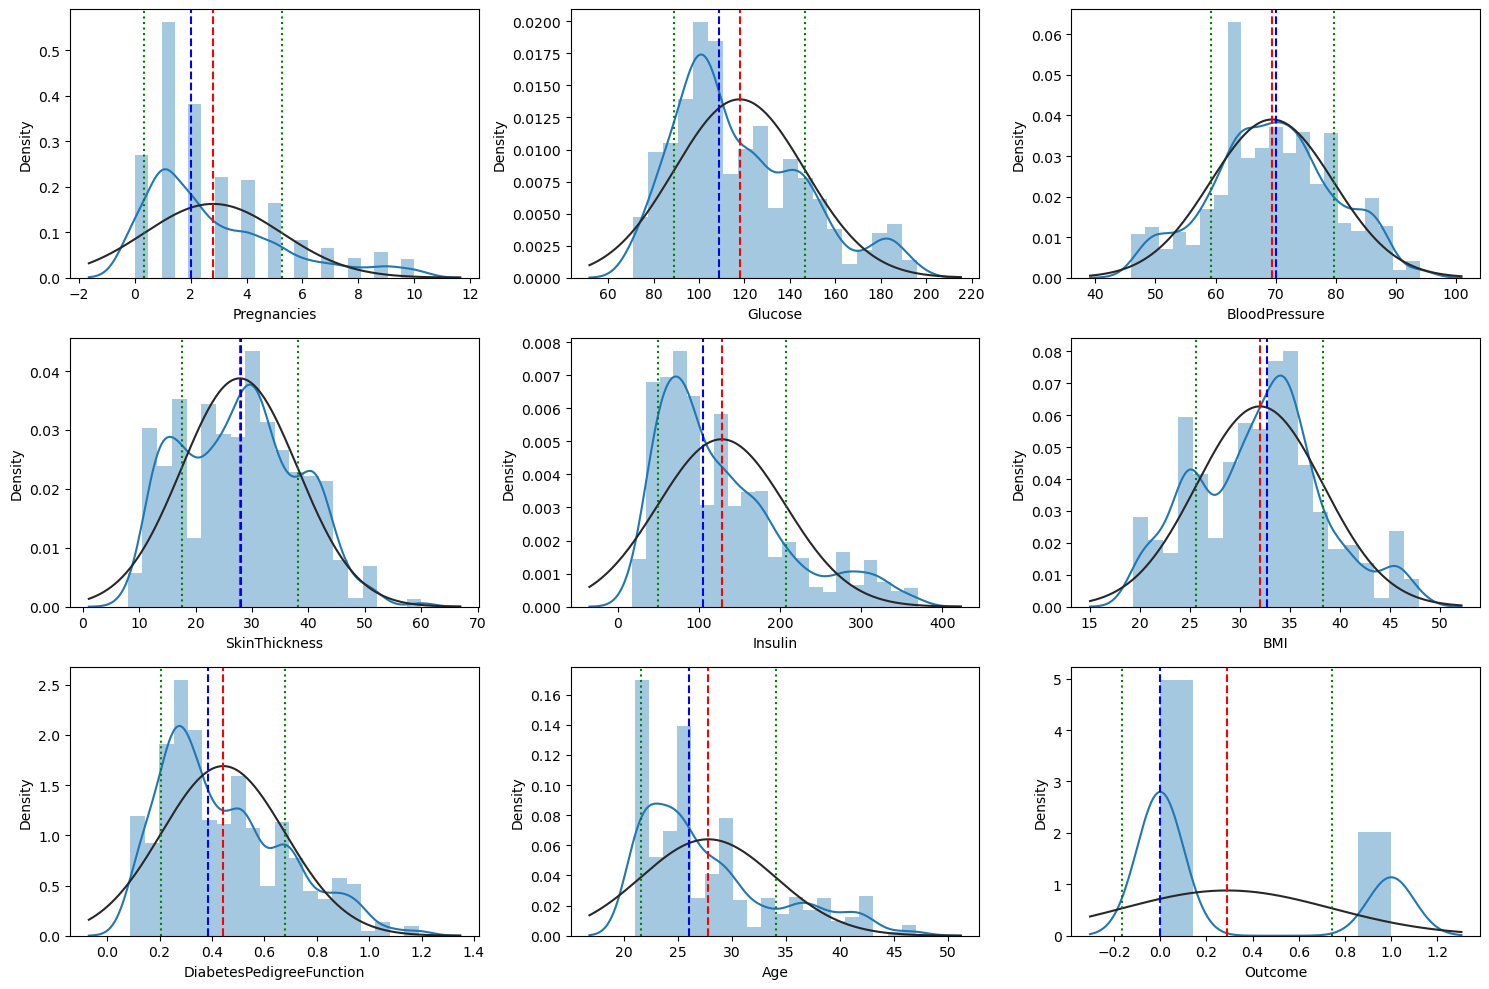

In [26]:
counter=0
plt.figure(figsize=(15,10))

for i in train.columns:
    counter+=1
    plt.subplot(3,3,counter)
    sns.distplot(train[i], fit=norm, kde=True)

    # Calculate the mean and standard deviation
    mean = train[i].mean()
    std_dev = train[i].std()
    median = train[i].median()

    # Add lines for the mean, mean + std_dev and mean - std_dev
    plt.axvline(mean, color='r', linestyle='--')
    plt.axvline(median , color = 'b',linestyle='--' )
    plt.axvline(mean + std_dev, color='g', linestyle=':')
    plt.axvline(mean - std_dev, color='g', linestyle=':')

plt.tight_layout()
plt.show()


## Probability Plot Explanation

The given Python code generates probability plots for each feature in the `train` dataset using the `probplot` function from the `scipy.stats` module. Here's what the code does and the insights it provides:

- **Importing scipy.stats**: The `scipy.stats` module is imported as `s`, which contains statistical functions.

- **Looping Through Columns**: The code iterates over each column in the `train` dataframe.

- **Creating a Figure**: For each feature, a new figure with a size of 5x3 inches is created.

- **Generating Probability Plot**: The `probplot` function is called with the current feature's data, plotting it against a theoretical normal distribution.

- **Title and Display**: Each plot is titled with the name of the feature and displayed.

The outcome of this code is a series of plots that show how well the data distribution of each feature fits a normal distribution. Points following a straight line indicate a normal distribution, while deviations suggest skewness or outliers.


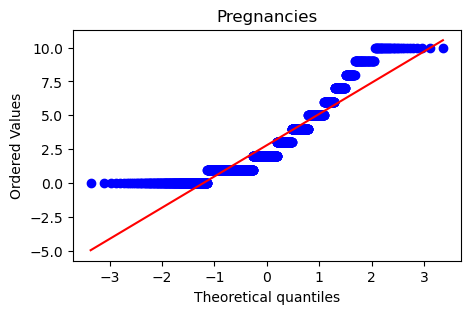

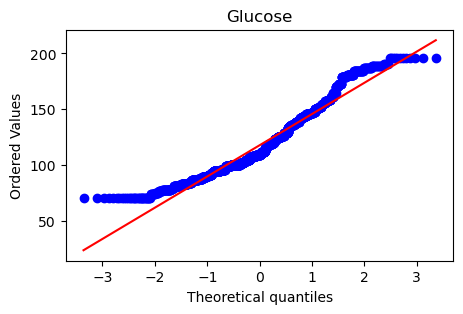

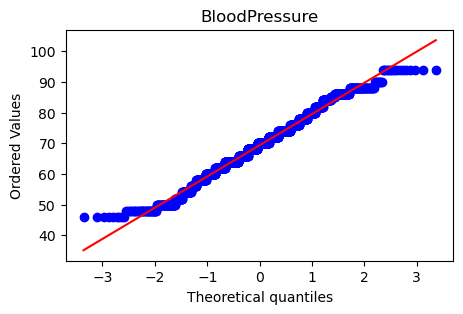

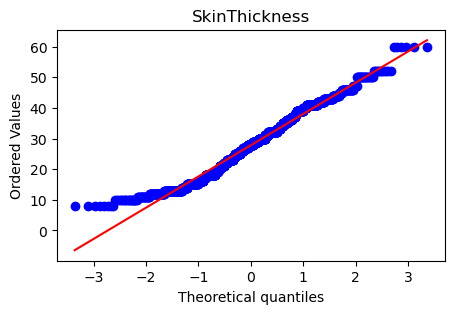

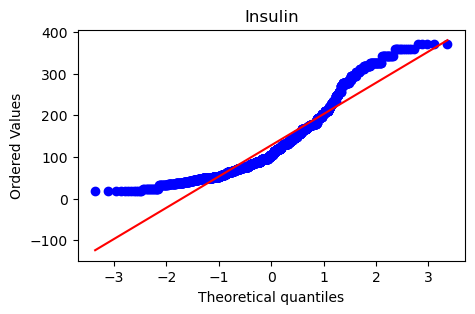

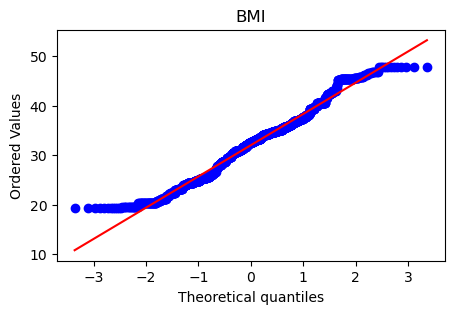

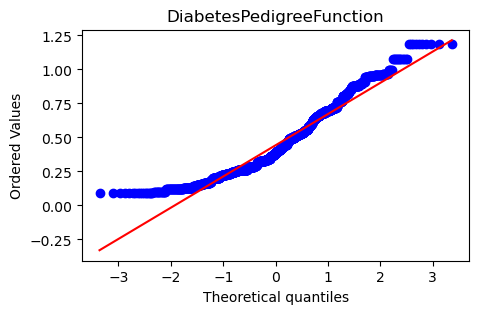

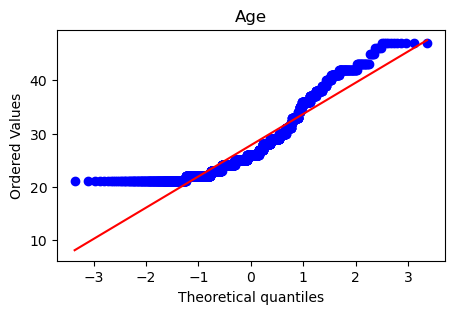

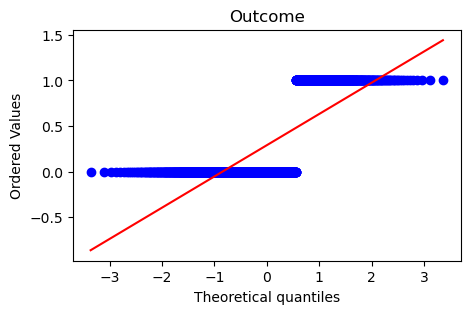

In [27]:
import scipy.stats as s
for i in train.columns:
    plt.figure(figsize=(5,3))
    s.probplot(train[i], plot = plt)
    plt.title(i)
    plt.show()

## Skewness of the dataframe

## Pearson's Second Coefficient of Skewness Calculation

The Python code snippet calculates Pearson's second coefficient of skewness for each feature in the `train` DataFrame and stores the results in a new DataFrame. Here's the breakdown of the code's functionality:

- **Initializing DataFrame**: An empty DataFrame `df_pearson` is created with columns 'Column' and 'Pearson'.

- **Looping Through Columns**: The code iterates over each feature name in the DataFrame.

- **Calculating Statistics**: For each feature, the mean, median, and standard deviation are calculated.

- **Pearson's Coefficient**: Pearson's second coefficient of skewness is computed using the formula $$ \text{Pearson} = \frac{3 \times (\text{mean} - \text{median})}{\text{std}} $$.

- **Temporary DataFrame**: A temporary DataFrame `df_temp` is created for the current feature with its Pearson coefficient.

- **Concatenating DataFrames**: `df_temp` is concatenated to `df_pearson`, adding the Pearson coefficient for the current feature.

- **Displaying Results**: The final `df_pearson` DataFrame, containing the Pearson coefficients for all features, is printed.

Pearson's second coefficient of skewness is a measure of asymmetry in the distribution of data. A value close to zero indicates a symmetric distribution, positive values indicate a right-skewed distribution, and negative values indicate a left-skewed distribution.


In [28]:
# Initialize an empty DataFrame
df_pearson = pd.DataFrame(columns=['Column', 'Pearson'])

for c in train.columns:
    mean = train[c].mean()
    median = train[c].median()
    std = train[c].std()
    # Pearson's second coefficient = 3(mean - median)/std
    pearson = (3 * (mean - median)) / std

    # Create a DataFrame for the current column
    df_temp = pd.DataFrame({'Column': [c], 'Pearson': [pearson]})

    # Concatenate with df_pearson
    df_pearson = pd.concat([df_pearson, df_temp], ignore_index=True)

# Print the DataFrame
df_pearson


,Column,Pearson
0,Pregnancies,0.972006
1,Glucose,0.926007
2,BloodPressure,-0.179477
3,SkinThickness,-0.053414
4,Insulin,0.876902
5,BMI,-0.322352
6,DiabetesPedigreeFunction,0.733602
7,Age,0.867107
8,Outcome,1.912060


## Train_Test_Split

In [29]:
x_train = train.iloc[:,0:8]
y_train = train.iloc[:,8]
x_test = test.iloc[:,0:8]
y_test = test.iloc[:,8]

In [30]:
x_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,1,89,66,23,94,28.1,0.167,21
2,3,78,50,32,88,31.0,0.248,26
6,0,118,84,47,230,45.8,0.551,31
8,1,115,70,30,96,34.6,0.529,32
9,3,126,88,41,235,39.3,0.704,27
...,...,...,...,...,...,...,...,...
2261,2,146,70,38,360,28.0,0.337,29
2262,3,78,50,32,88,31.0,0.248,26
2263,0,165,76,43,255,47.9,0.259,26
2266,1,112,72,30,176,34.4,0.528,25


In [31]:
x_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,9,120,72,22,56,20.8,0.733,48
1,1,71,62,0,0,21.8,0.416,26
2,8,74,70,40,49,35.3,0.705,39
3,5,88,78,30,0,27.6,0.258,37
4,10,115,98,0,0,24.0,1.022,34
...,...,...,...,...,...,...,...,...
303,10,101,76,48,180,32.9,0.171,63
304,2,122,70,27,0,36.8,0.340,27
305,5,121,72,23,112,26.2,0.245,30
306,1,126,60,0,0,30.1,0.349,47


In [32]:
y_train

0       0
2       1
6       1
8       1
9       0
       ..
2261    1
2262    1
2263    0
2266    0
2267    0
Name: Outcome, Length: 1789, dtype: int64

In [33]:
y_test

0      0
1      0
2      0
3      0
4      0
      ..
303    0
304    0
305    0
306    1
307    0
Name: Outcome, Length: 308, dtype: int64

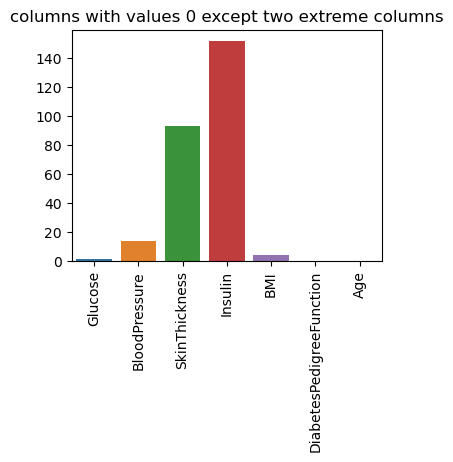

In [34]:
zero_counts_mod = (test.iloc[:,1:8] == 0).sum()
plt.figure(figsize=(4,3))
sns.barplot(x=zero_counts_mod.index, y=zero_counts_mod.values)
plt.xticks(rotation=90)
plt.title("columns with values 0 except two extreme columns")
plt.show()

## Addressing Anomalies in Test Dataset

From the analysis above, it's evident that the test dataset contains numerous anomalies. These anomalies can potentially skew the results of any tests or models applied to the data. To ensure the integrity of the test, it's crucial to:

- **Identify Anomalies**: Detect and list the anomalies present in the dataset.
- **Exclusion Criteria**: Establish criteria for what constitutes a hindrance and should be excluded.
- **Comparative Analysis**: Examine both the training and test datasets to ensure consistency in data quality.

By taking these steps, we can mitigate the impact of outliers and anomalies on the test's outcome, leading to more reliable and accurate results.

In [35]:
print(f"Glucose => {(test['Glucose']==0).sum()}")
print(f"BloodPressure => {(test['BloodPressure']==0).sum()}")
print(f"SkinThickness => {(test['SkinThickness']==0).sum()}")
print(f"Insulin => {(test['Insulin']==0).sum()}")
print(f"BMI => {(test['BMI']==0).sum()}")

Glucose => 1
BloodPressure => 14
SkinThickness => 93
Insulin => 152
BMI => 4


In [36]:
columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for column in columns:
    test = test[test[column] != 0]

In [37]:
print(f"Glucose => {(test['Glucose']==0).sum()}")
print(f"BloodPressure => {(test['BloodPressure']==0).sum()}")
print(f"SkinThickness => {(test['SkinThickness']==0).sum()}")
print(f"Insulin => {(test['Insulin']==0).sum()}")
print(f"BMI => {(test['BMI']==0).sum()}")

Glucose => 0
BloodPressure => 0
SkinThickness => 0
Insulin => 0
BMI => 0


In [38]:
test.reset_index(drop=True,inplace=True)
test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,9,120,72,22,56,20.8,0.733,48,0
1,8,74,70,40,49,35.3,0.705,39,0
2,0,124,56,13,105,21.8,0.452,21,0
3,0,74,52,10,36,27.8,0.269,22,0
4,0,97,64,36,100,36.8,0.600,25,0
...,...,...,...,...,...,...,...,...,...
151,0,181,88,44,510,43.3,0.222,26,1
152,1,128,88,39,110,36.5,1.057,37,1
153,2,88,58,26,16,28.4,0.766,22,0
154,10,101,76,48,180,32.9,0.171,63,0


New test

In [39]:
x_test_new = test.iloc[:,0:8]
y_test_new = test.iloc[:,8]

In [40]:
x_test_new

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,9,120,72,22,56,20.8,0.733,48
1,8,74,70,40,49,35.3,0.705,39
2,0,124,56,13,105,21.8,0.452,21
3,0,74,52,10,36,27.8,0.269,22
4,0,97,64,36,100,36.8,0.600,25
...,...,...,...,...,...,...,...,...
151,0,181,88,44,510,43.3,0.222,26
152,1,128,88,39,110,36.5,1.057,37
153,2,88,58,26,16,28.4,0.766,22
154,10,101,76,48,180,32.9,0.171,63


In [41]:
preprocessor = StandardScaler()

classifiers = [
    ('lr', LogisticRegression()),
    ('svm', SVC()),
    ('dt', DecisionTreeClassifier()),
    ('knn', KNeighborsClassifier()),
    ('ann', MLPClassifier())
]

In [42]:
print("For unrefined Test set\n\n")

for classifier_name, classifier in classifiers:
    pipeline_basic = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier_name', classifier)])
    # You can now fit and transform the pipeline
    pipeline_basic.fit(x_train, y_train)
    predictions = pipeline_basic.predict(x_test)
    accuracy = accuracy_score(y_test,predictions)
    print(f"Accuracy of {classifier}: {accuracy}\n")

For unrefined Test set


Accuracy of LogisticRegression(): 0.8051948051948052

Accuracy of SVC(): 0.7045454545454546

Accuracy of DecisionTreeClassifier(): 0.7305194805194806

Accuracy of KNeighborsClassifier(): 0.6655844155844156

Accuracy of MLPClassifier(): 0.724025974025974



In [43]:
print("For refined Test set\n\n")

for classifier_name, classifier in classifiers:
    pipeline_good = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier_name', classifier)])
    # You can now fit and transform the pipeline
    pipeline_good.fit(x_train, y_train)
    predictions = pipeline_good.predict(x_test_new)
    accuracy = accuracy_score(y_test_new,predictions)
    print(f"Accuracy of {classifier}: {accuracy}\n")

For refined Test set


Accuracy of LogisticRegression(): 0.8397435897435898

Accuracy of SVC(): 0.7692307692307693

Accuracy of DecisionTreeClassifier(): 0.6923076923076923

Accuracy of KNeighborsClassifier(): 0.7243589743589743

Accuracy of MLPClassifier(): 0.75



## Improved Test Data After Cleaning

The cleaning process applied to the test data has led to improved values. This typically means that:

- **Noise Reduction**: Irrelevant or extraneous information has been removed.
- **Outlier Removal**: Extreme values that could distort statistical analysis have been excluded.
- **Consistency**: The data now follows a more consistent pattern, which is crucial for accurate modeling.

As a result, the test data is now more representative and reliable for further analysis or model testing, ensuring better performance and more trustworthy outcomes.


In [44]:
x_train.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [45]:
x_train.shape

(1789, 8)

## Please enter data to test the output predicted by the models

In [46]:
lst = []
lst.append(int(input("Enter number of Pregnancies ")))
lst.append(int(input("Enter GLUCOSE ")))
lst.append(int(input("Enter BloodPressure ")))
lst.append(int(input("Enter SkinThickness ")))
lst.append(int(input("Enter Insulin ")))
lst.append(float(input("Enter BMI ")))
lst.append(float(input("Enter DiabetesPedigreeFunction ")))
lst.append(int(input("Enter Age ")))

Enter number of Pregnancies  1
Enter GLUCOSE  120
Enter BloodPressure  72
Enter SkinThickness  22
Enter Insulin  56
Enter BMI  20
Enter DiabetesPedigreeFunction  0.8
Enter Age  20


In [47]:
lst

[1, 120, 72, 22, 56, 20.0, 0.8, 20]

In [48]:
print("Predicing the input values \n\n")

for classifier_name, classifier in classifiers:
    pipeline_good = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier_name', classifier)])
    new_row = np.array(lst).reshape(1,-1)
    new_prediction = pipeline_good.predict(new_row)
    print(f'Prediction for new row using {classifier_name}: {new_prediction}')

Predicing the input values 


Prediction for new row using lr: [0]
Prediction for new row using svm: [0]
Prediction for new row using dt: [0]
Prediction for new row using knn: [0]
Prediction for new row using ann: [0]


In [49]:
pipeline_lr = Pipeline(steps=[('preprocessor', preprocessor),
                               ('lr', LogisticRegression())])
pipeline_lr.fit(x_train, y_train)
new_row = np.array(lst).reshape(1,-1)
new_prediction = pipeline_lr.predict(new_row)
print(f'Prediction for new row using lr: {new_prediction}')

Prediction for new row using lr: [0]


Hence we can see that almost all the time lr is the best and gives us the best result

In [59]:
import pickle
# Save the trained model as a pickle string.
saved_model = pickle.dumps(pipeline_lr)

# Save the model to disk
with open('Diabetes_lr.pkl', 'wb') as file:
    pickle.dump(pipeline_lr, file)